In [326]:
from __future__ import print_function, division, absolute_import
from os import path
import glob
import pprint
import numpy as np                
import pandas as pd
import matplotlib.pyplot as plt 
import tables
import h5py
import csv
import ipywidgets as wg
from IPython.display import display
from numpy.random import randint
import scipy.stats as stats
from scipy.stats import f_oneway

In [217]:
# load the dataset
f=h5py.File('data/PVC-7/concat_31Hz.h5','r')
ls = list(f)
print('List of datasets in this file: \n',ls)
dset = f['data']
print('dset',dset.shape)

# f.close()

List of datasets in this file: 
 ['data']
dset (255256, 512, 1154)


In [218]:
# open the stimulus.csv as integer, so the values can be used in the function to calculate df/f.

df = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv').astype(int)
df.columns = ["start","end","ori","sf","tf","contrast"]
stimuli = np.array(df[["start","end","ori","sf","tf","contrast"]])
print(stimuli)
stimuli.dtype
stimuli.shape

# stimlist = []
# with open('data/PVC-7/122008_140124_windowmix/stimulus.csv','r') as csvfile:
#     reader = csv.reader(csvfile,  delimiter=',', quotechar='|') 
#     for row in reader: # each row is a list
#         stimlist.append(row)


[[ 31141  31231      0      0      1      0]
 [ 86248  86338      0      0      1      0]
 [ 87900  87990      0      0      1      0]
 ...
 [ 87750  87840    315      0     15      0]
 [198865 198955    315      0     15      0]
 [213881 213971    315      0     15      0]]


(1600, 6)

In [219]:
# pick a ROI: create a slider to view the whole field
def imaging(frame):
    singleframe = dset[frame, 60:400,100:600]
    plt.imshow(singleframe)
    
f_slide=wg.IntSlider(min=0, max=255255, value=0,description = 'Frame')
wg.interact(imaging,frame=f_slide)

interactive(children=(IntSlider(value=0, description='Frame', max=255255), Output()), _dom_classes=('widget-in…

<function __main__.imaging(frame)>

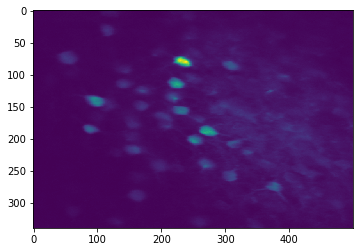

In [220]:
# pick a ROI: find the cell
smalldset1000z1 = np.mean(dset[10000:13000,60:400,100:600],axis=0)
smalldset1000z1.shape
plt.imshow(smalldset1000z1)

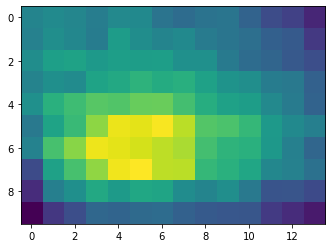

In [221]:
# pick a ROI: find the cell
smalldset1000z1 = np.mean(dset[10000:13000,297:307,364:378],axis=0)
smalldset1000z1.shape
plt.imshow(smalldset1000z1)

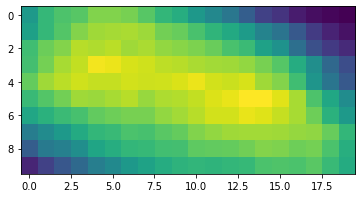

In [222]:
# pick a ROI: zoom in. The rectangle matrix is defined as ROI.
smalldset1000z1 = np.mean(dset[10000:13000,135:145,325:345],axis=0)
smalldset1000z1.shape
plt.imshow(smalldset1000z1)

In [223]:
# define the function to aquire df/f for a neuron [jstart:jend,kstart:kend]
def dff_results(jstart,jend,kstart,kend):
    dff_mean_all= []
    for stimrow in stimuli[:,0]:
        F0=np.mean(dset[(stimrow-30):stimrow,jstart:jend,kstart:kend],axis=0)# baseline response: for each pixel, average across frames. 2D matrix
        F=np.mean(dset[stimrow:(stimrow+90),jstart:jend,kstart:kend],axis=0)# stumulus response: for each pixel, average across frames. 2D matrix
        dff = (F-F0)/F0 # 2D matrix
        dff_mean = np.mean(dff)# one df/f for each trial
        dff_mean_all = np.append(dff_mean_all,dff_mean)# an array of df/f for 1600 trials
    return dff_mean_all


In [224]:
# create stimuli sets for spatial frequency and temporal frequency
sfset = [0.02,0.04,0.08,0.16,0.32]
tfset = [1,2,4,8,15]

In [ ]:
# For each neuron, repeat the steps as follows:

# (1) create a dataframe for ROI = [jstart:jend,kstart:kend]. shape=(1600,7)
# (2) create a grouped dataframe of the neuron's dff under 5sf*5tf condition.
# (3) update groupedDF. let groupedDF represent the current neuron.
# (4) plot direction tuning under different spatial frequencies, merged across temporal frequencies
# (5) plot direction tuning under different temporal frequencies, merged across spatial frequencies
# (6) plot direction tuning under 5 sf * 5 tf combinations.
# (7) plot direction tuning under 5 sf * 5 tf combinations, using polar diagram

In [225]:
### Neuron 1
# create a dataframe for ROI 1 = [135:145,325:345]. shape=(1600,7)

DFneuron1 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron1.insert(6,'dff',dff_results(135,145,325,345)) 

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8 -0.058822
1      86248   86338    0  0.02   1       0.8  0.043043
2      87900   87990    0  0.02   1       0.8 -0.112730
3     112976  113066    0  0.02   1       0.8  0.015696
4     132196  132286    0  0.02   1       0.8 -0.011235
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8 -0.021169
1596   70632   70722  315  0.32  15       0.8  0.030351
1597   87750   87840  315  0.32  15       0.8 -0.087927
1598  198865  198955  315  0.32  15       0.8 -0.019345
1599  213881  213971  315  0.32  15       0.8 -0.075346

[1600 rows x 7 columns]


In [259]:
# create a grouped dataframe of the neuron's dff under 5sf*5tf condition.

print(DFneuron1)
groupedDF1 = DFneuron1.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF1)

# update groupedDF. let groupedDF represent the current neuron.
groupedDF = groupedDF1

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8 -0.058822
1      86248   86338    0  0.02   1       0.8  0.043043
2      87900   87990    0  0.02   1       0.8 -0.112730
3     112976  113066    0  0.02   1       0.8  0.015696
4     132196  132286    0  0.02   1       0.8 -0.011235
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8 -0.021169
1596   70632   70722  315  0.32  15       0.8  0.030351
1597   87750   87840  315  0.32  15       0.8 -0.087927
1598  198865  198955  315  0.32  15       0.8 -0.019345
1599  213881  213971  315  0.32  15       0.8 -0.075346

[1600 rows x 7 columns]
     tf    sf  ori       dff
0     1  0.02    0 -0.030183
1     1  0.02   45  0.117044
2     1  0.02   90  0.041108
3     1  0.02  135 -0.038408
4     1  0.02  180  0.008886
..   ..   ...  ...       ...
195  15  0.32  135  0.132602
196  15  0.32  180 -0.003241
197  15  0.32  225  0.031200
198  15  0.32

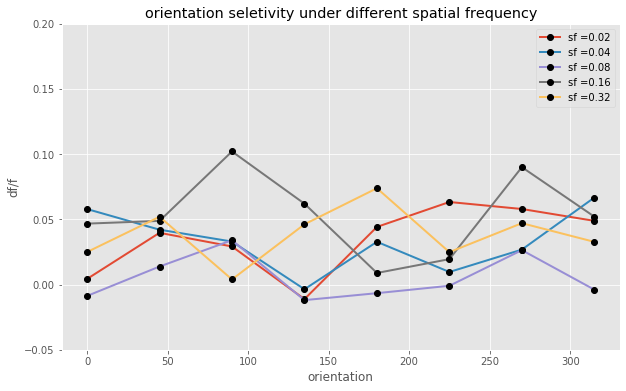

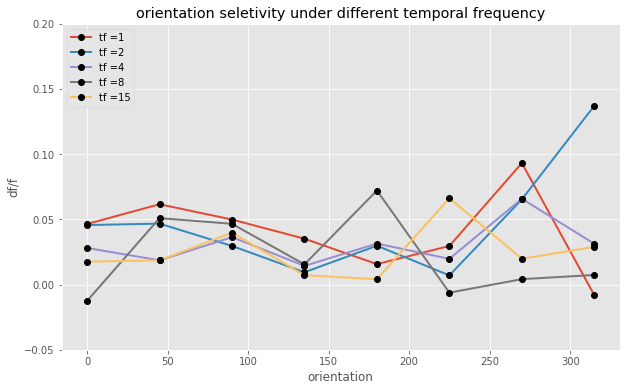

Text(0.07, 0.5, 'df/f')

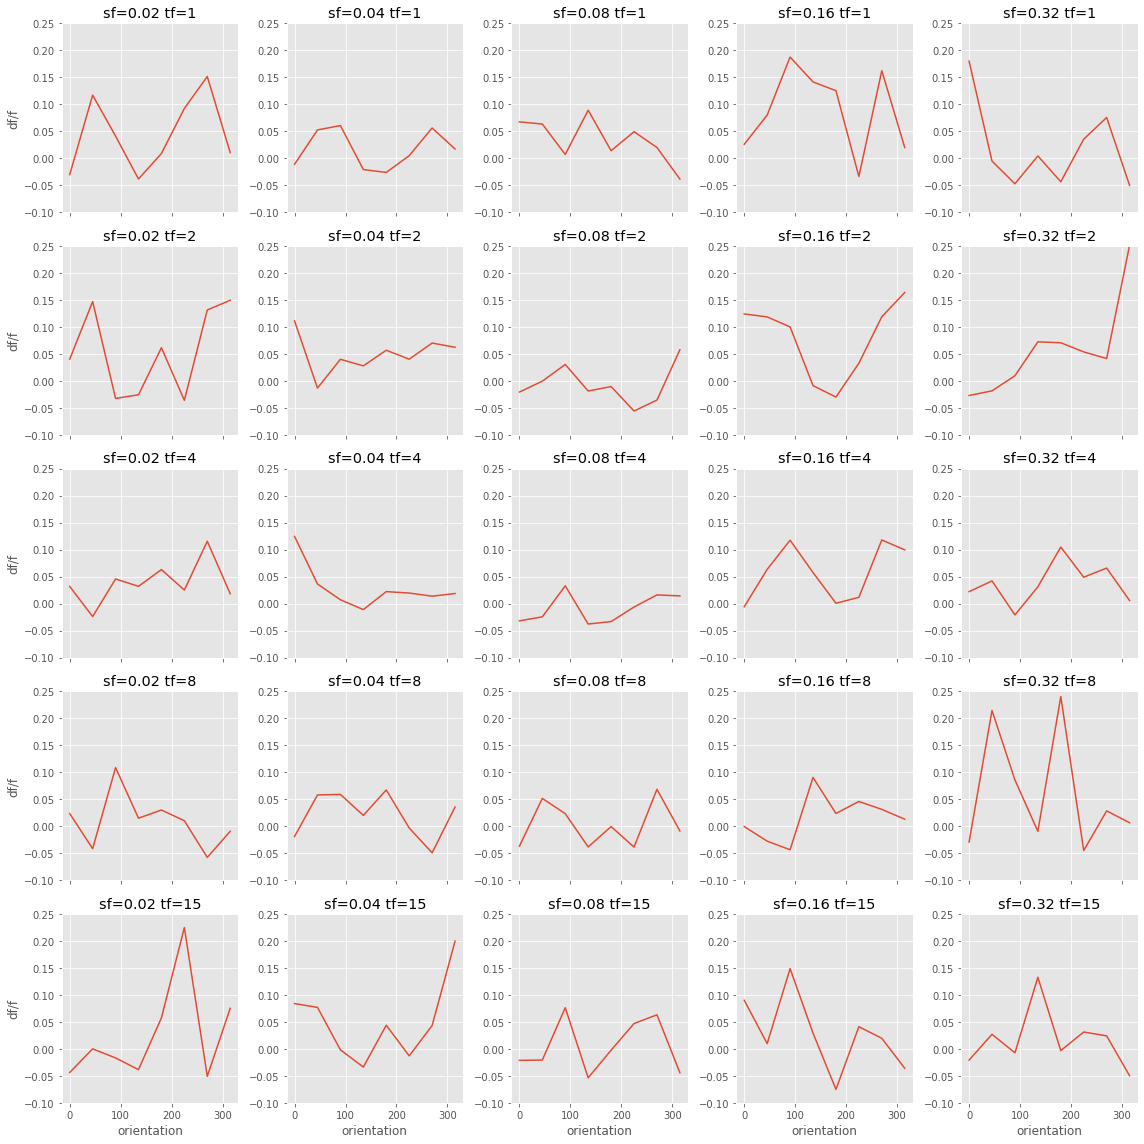

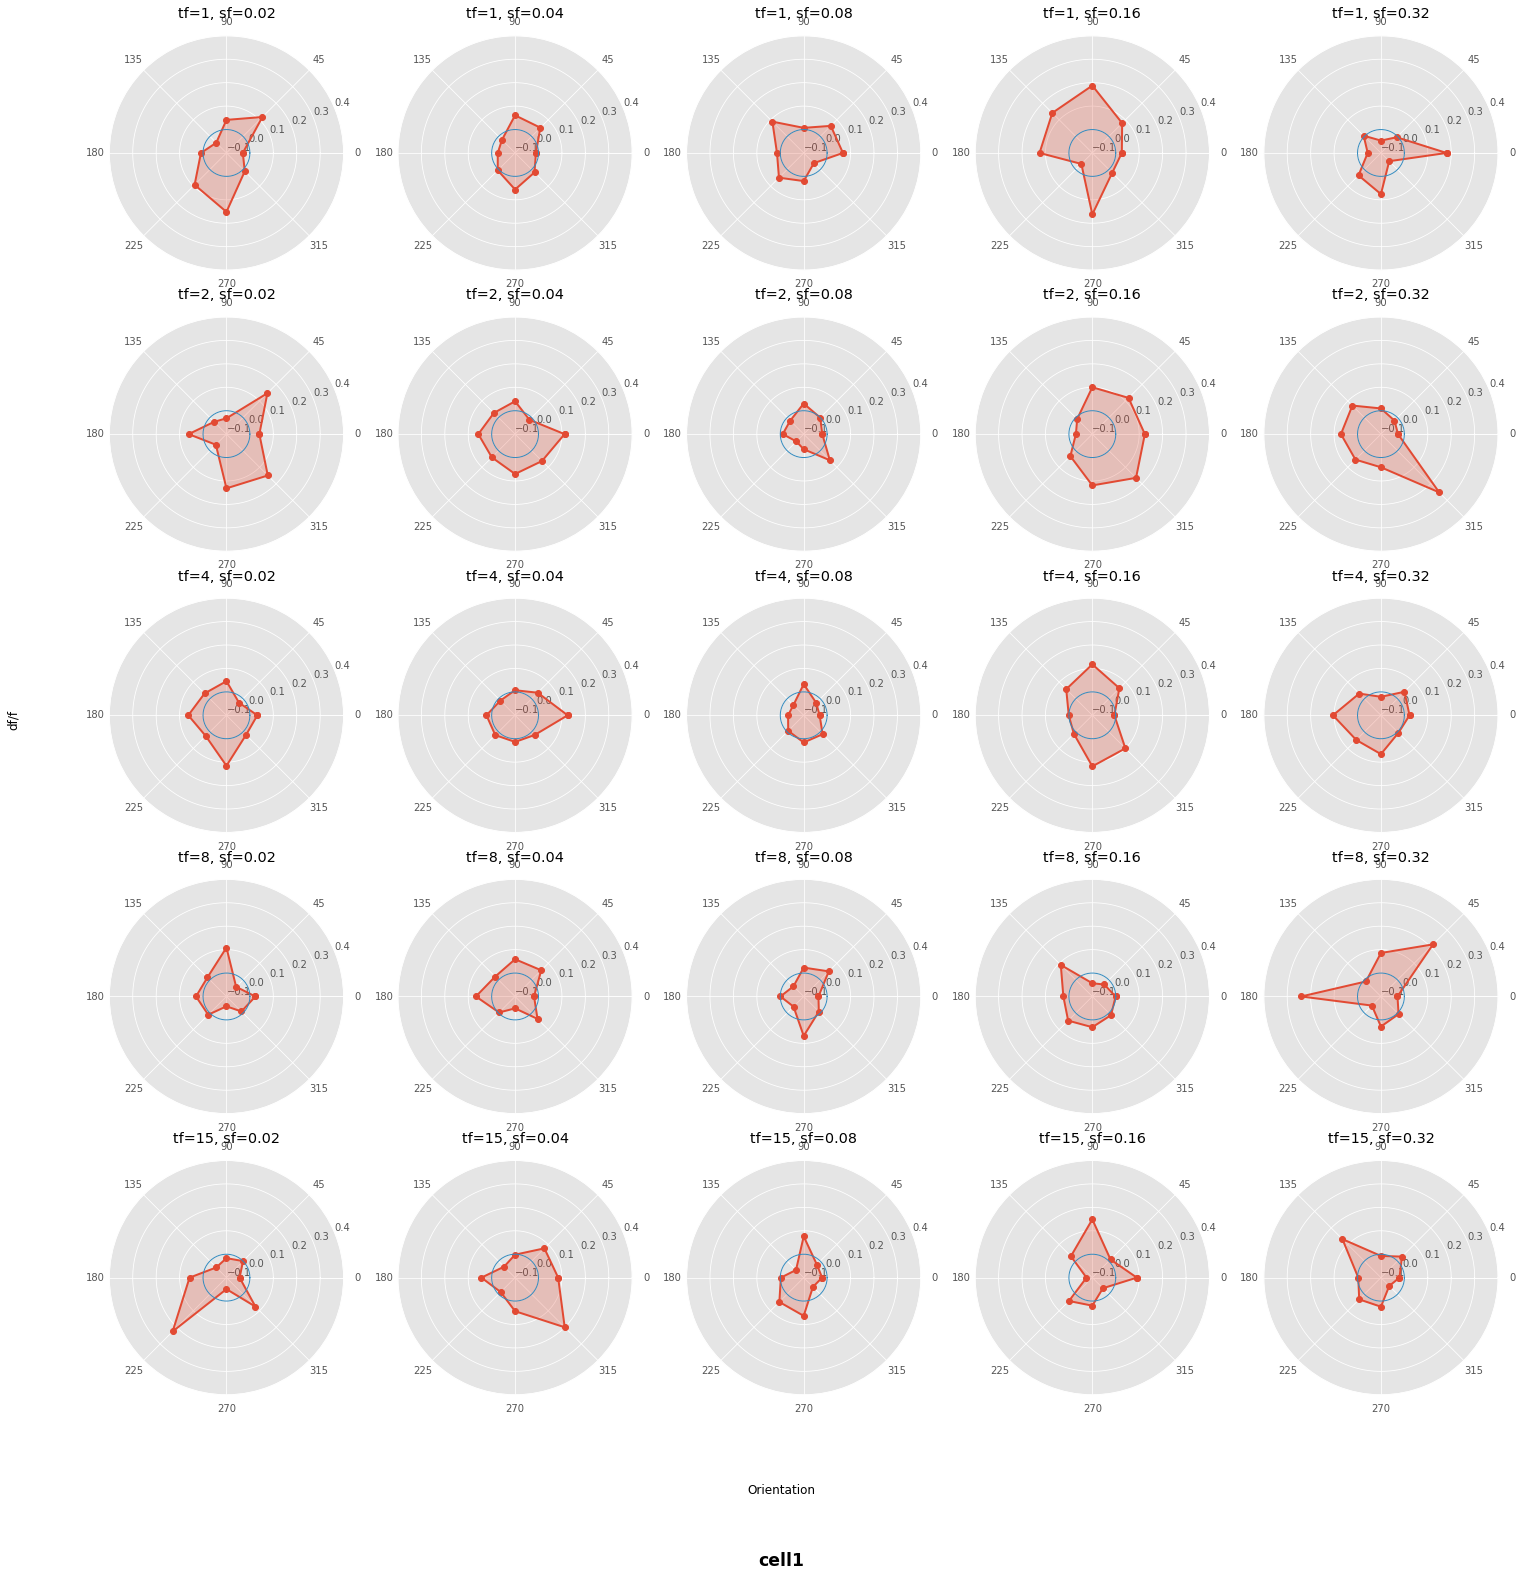

In [260]:
# plot direction tuning under different spatial frequencies, merged across temporal frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = groupedDF.loc[groupedDF['sf']==tempsf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under different temporal frequencies, merged across spatial frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = groupedDF.loc[groupedDF['tf']==temptf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under 5 sf * 5 tf combinations.


fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        axes[i,j].plot(groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['ori'], 
                       groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

plt.tight_layout()

# plot direction tuning under 5 sf * 5 tf combinations, using polar diagram.

ori = [0,45,90,135,180,225,270,315]
fig= plt.figure(figsize=(25, 25))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        
        stats = np.array(groupedDF.loc[(groupedDF['sf']==tempsf)&(groupedDF['tf']==temptf)]['dff']) 
        markers = np.linspace(-0.1, 0.4, 6) # make changes.
        labels = np.array(ori)
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats = np.concatenate((stats,[stats[0]]))
        angles = np.concatenate((angles,[angles[0]]))        
        circle = np.linspace(0, 2*np.pi, endpoint=False)
        circle = np.concatenate((circle,[circle[0]]))       
        ax = fig.add_subplot(5,5,i*5+j+1, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
        ax.plot(circle, np.zeros_like(circle), '-', linewidth=1)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        plt.yticks(markers)
        ax.set_title('tf='+str(tfset[i])+', sf='+str(sfset[j]))

fig.text(0.5, 0.03, 'cell1', ha='center',size = 'xx-large',fontweight = 'heavy')
fig.text(0.5, 0.07, 'Orientation', ha='center',size = 'large')
fig.text(0.07, 0.5, 'df/f', va='center', rotation='vertical',size = 'large')

In [254]:
### Neuron 2
# create a dataframe for ROI = [168:181,315:333]. shape=(1600,7)

DFneuron2 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron2.insert(6,'dff',dff_results(168,181,315,333)) 

In [261]:
# create a grouped dataframe of the neuron's dff under 5sf*5tf condition.

print(DFneuron2)
groupedDF2 = DFneuron2.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF2)

# update groupedDF. let groupedDF represent the current neuron.
groupedDF = groupedDF2

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8  1.137547
1      86248   86338    0  0.02   1       0.8  0.018805
2      87900   87990    0  0.02   1       0.8  0.032159
3     112976  113066    0  0.02   1       0.8  0.263300
4     132196  132286    0  0.02   1       0.8  0.030344
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8  0.001217
1596   70632   70722  315  0.32  15       0.8 -0.003551
1597   87750   87840  315  0.32  15       0.8 -0.036047
1598  198865  198955  315  0.32  15       0.8  0.185489
1599  213881  213971  315  0.32  15       0.8 -0.019453

[1600 rows x 7 columns]
     tf    sf  ori       dff
0     1  0.02    0  0.193308
1     1  0.02   45 -0.004506
2     1  0.02   90  0.015149
3     1  0.02  135 -0.049573
4     1  0.02  180  0.039540
..   ..   ...  ...       ...
195  15  0.32  135  0.016436
196  15  0.32  180  0.029052
197  15  0.32  225  0.087224
198  15  0.32

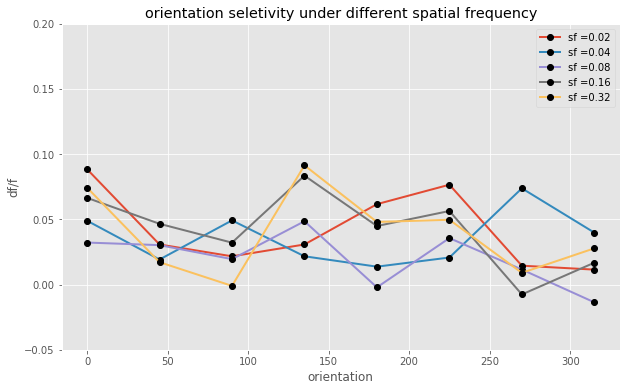

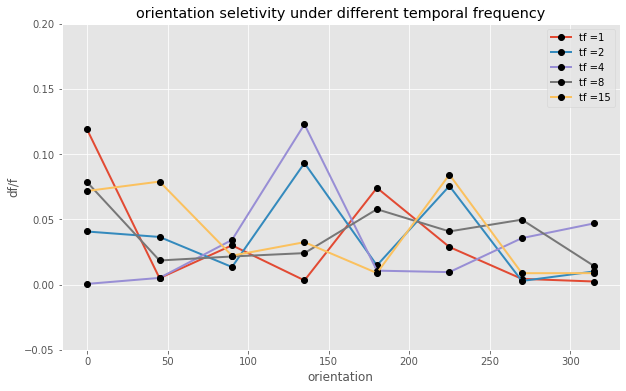

Text(0.07, 0.5, 'df/f')

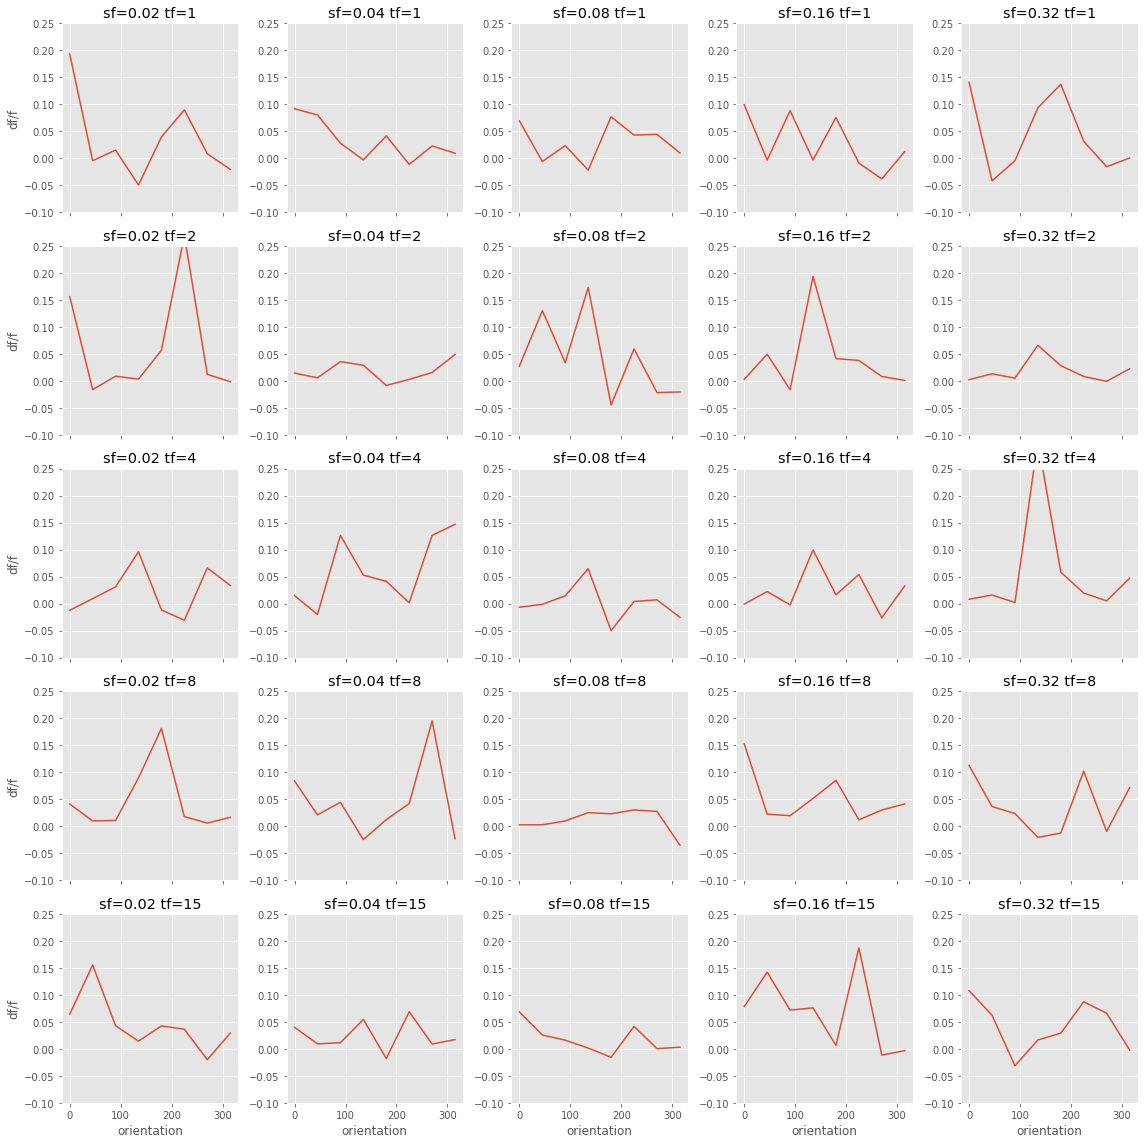

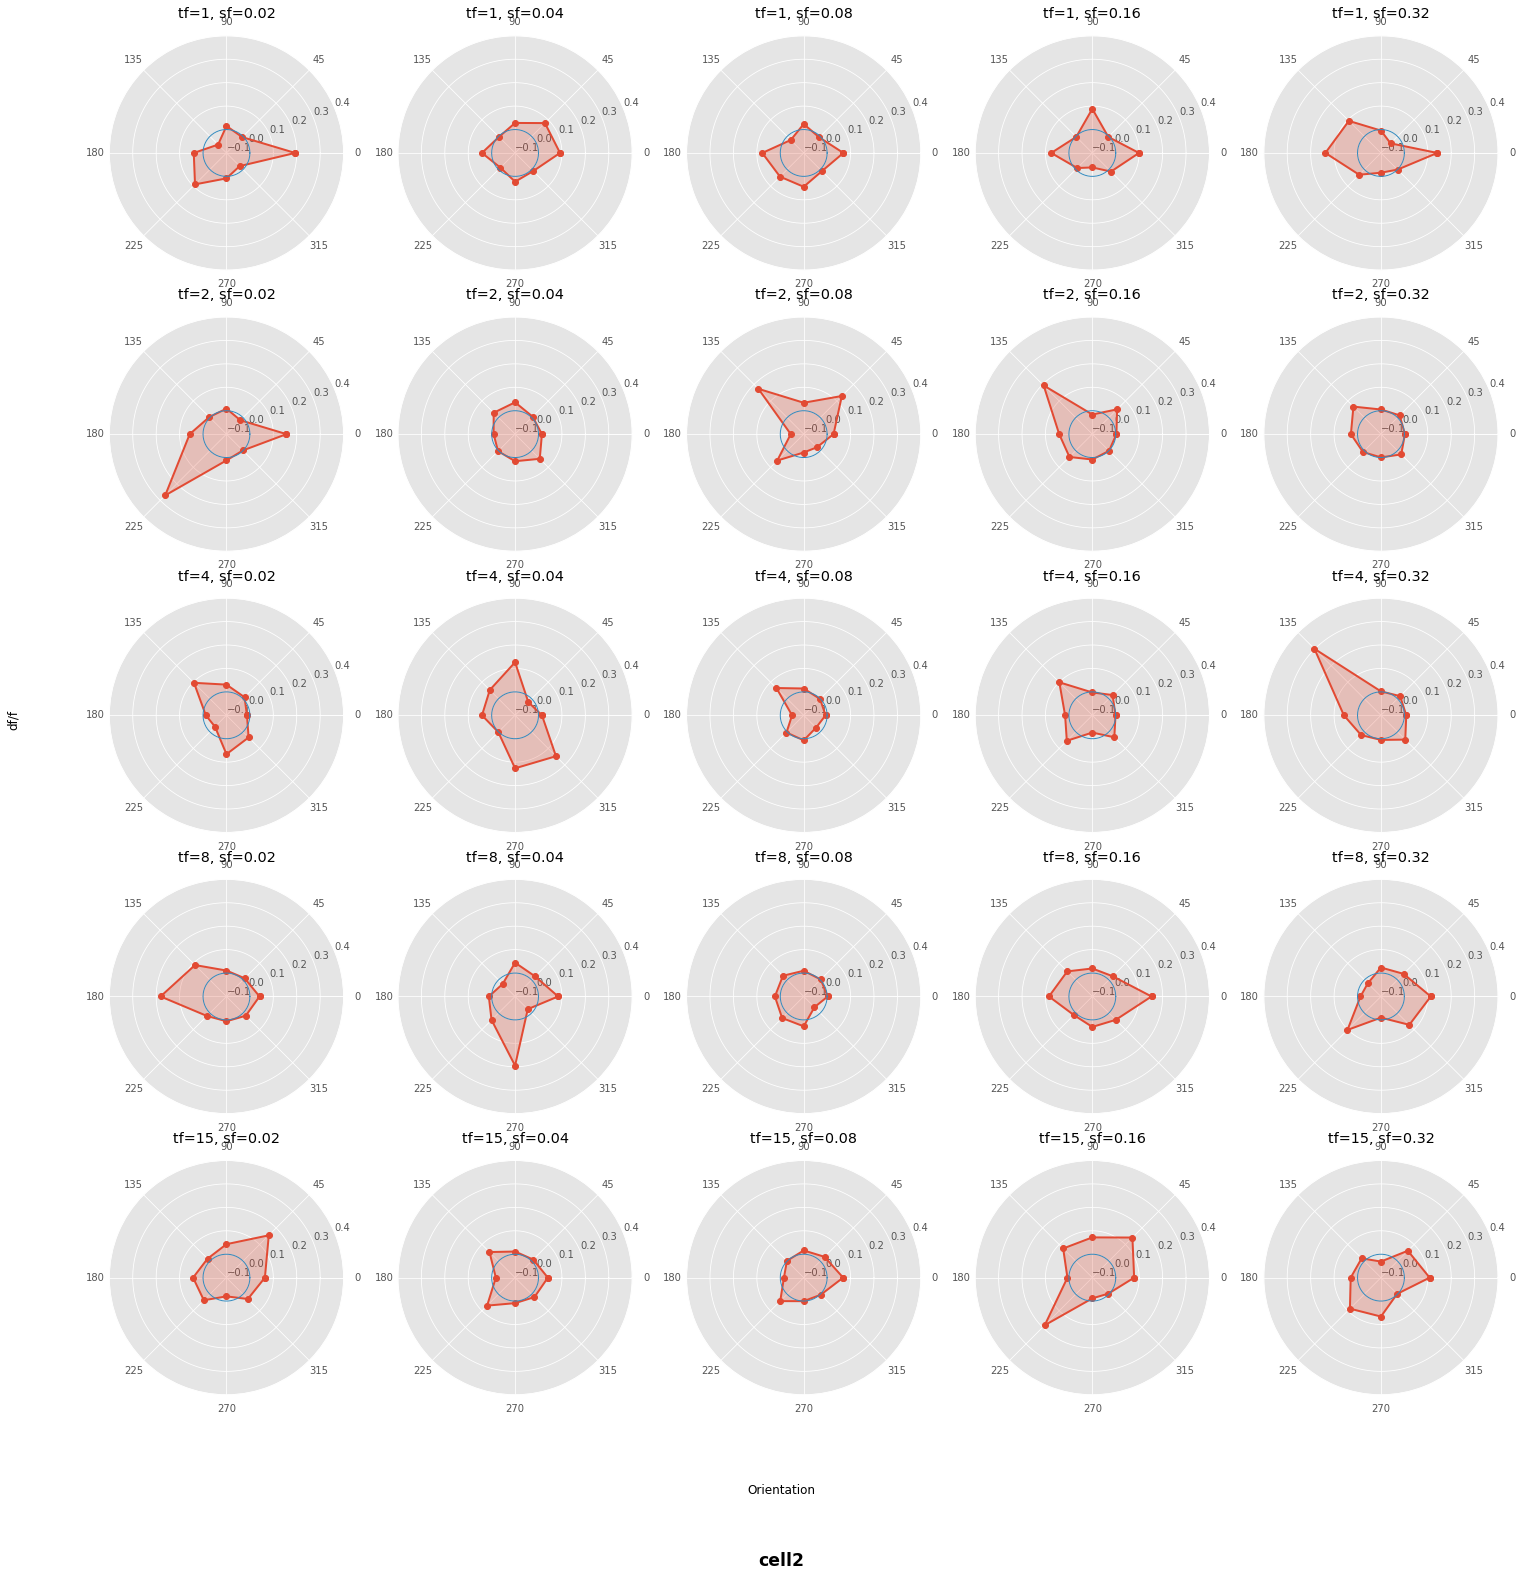

In [322]:
# plot direction tuning under different spatial frequencies, merged across temporal frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = groupedDF.loc[groupedDF['sf']==tempsf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under different temporal frequencies, merged across spatial frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = groupedDF.loc[groupedDF['tf']==temptf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under 5 sf * 5 tf combinations.


fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        axes[i,j].plot(groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['ori'], 
                       groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

plt.tight_layout()

# plot direction tuning under 5 sf * 5 tf combinations, using polar diagram.

ori = [0,45,90,135,180,225,270,315]
fig= plt.figure(figsize=(25, 25))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        
        stats = np.array(groupedDF.loc[(groupedDF['sf']==tempsf)&(groupedDF['tf']==temptf)]['dff']) 
        markers = np.linspace(-0.1, 0.4, 6) # make changes.
        labels = np.array(ori)
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats = np.concatenate((stats,[stats[0]]))
        angles = np.concatenate((angles,[angles[0]]))        
        circle = np.linspace(0, 2*np.pi, endpoint=False)
        circle = np.concatenate((circle,[circle[0]]))       
        ax = fig.add_subplot(5,5,i*5+j+1, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
        ax.plot(circle, np.zeros_like(circle), '-', linewidth=1)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        plt.yticks(markers)
        ax.set_title('tf='+str(tfset[i])+', sf='+str(sfset[j]))

fig.text(0.5, 0.03, 'cell2', ha='center',size = 'xx-large',fontweight = 'heavy')
fig.text(0.5, 0.07, 'Orientation', ha='center',size = 'large')
fig.text(0.07, 0.5, 'df/f', va='center', rotation='vertical',size = 'large')

In [356]:
### Neuron 3
# create a dataframe for ROI = [342:355,255:272]. shape=(1600,7)

DFneuron3 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron3.insert(6,'dff',dff_results(342,355,255,272)) 

In [357]:
# create a grouped dataframe of the neuron's dff under 5sf*5tf condition.

print(DFneuron3)
groupedDF3 = DFneuron3.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF3)

# update groupedDF. let groupedDF represent the current neuron.
groupedDF = groupedDF3

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8  0.007515
1      86248   86338    0  0.02   1       0.8  0.073564
2      87900   87990    0  0.02   1       0.8  0.036409
3     112976  113066    0  0.02   1       0.8  0.054007
4     132196  132286    0  0.02   1       0.8  0.031704
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8  0.040152
1596   70632   70722  315  0.32  15       0.8  0.055358
1597   87750   87840  315  0.32  15       0.8  0.078067
1598  198865  198955  315  0.32  15       0.8  0.026731
1599  213881  213971  315  0.32  15       0.8  0.061398

[1600 rows x 7 columns]
     tf    sf  ori       dff
0     1  0.02    0  0.025781
1     1  0.02   45  0.022269
2     1  0.02   90  0.019743
3     1  0.02  135  0.006566
4     1  0.02  180  0.032005
..   ..   ...  ...       ...
195  15  0.32  135  0.014671
196  15  0.32  180  0.015021
197  15  0.32  225  0.023896
198  15  0.32

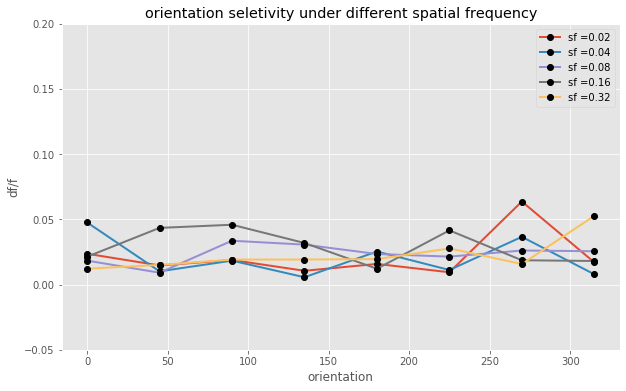

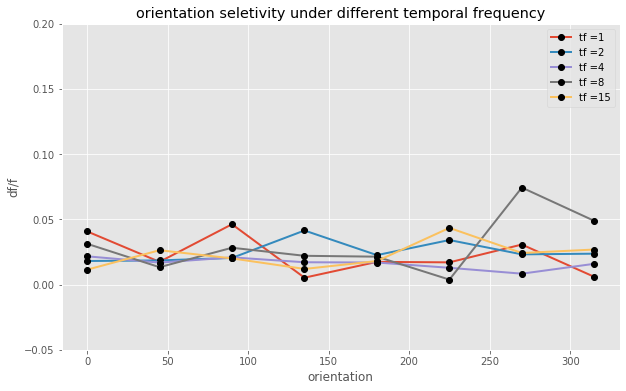

Text(0.07, 0.5, 'df/f')

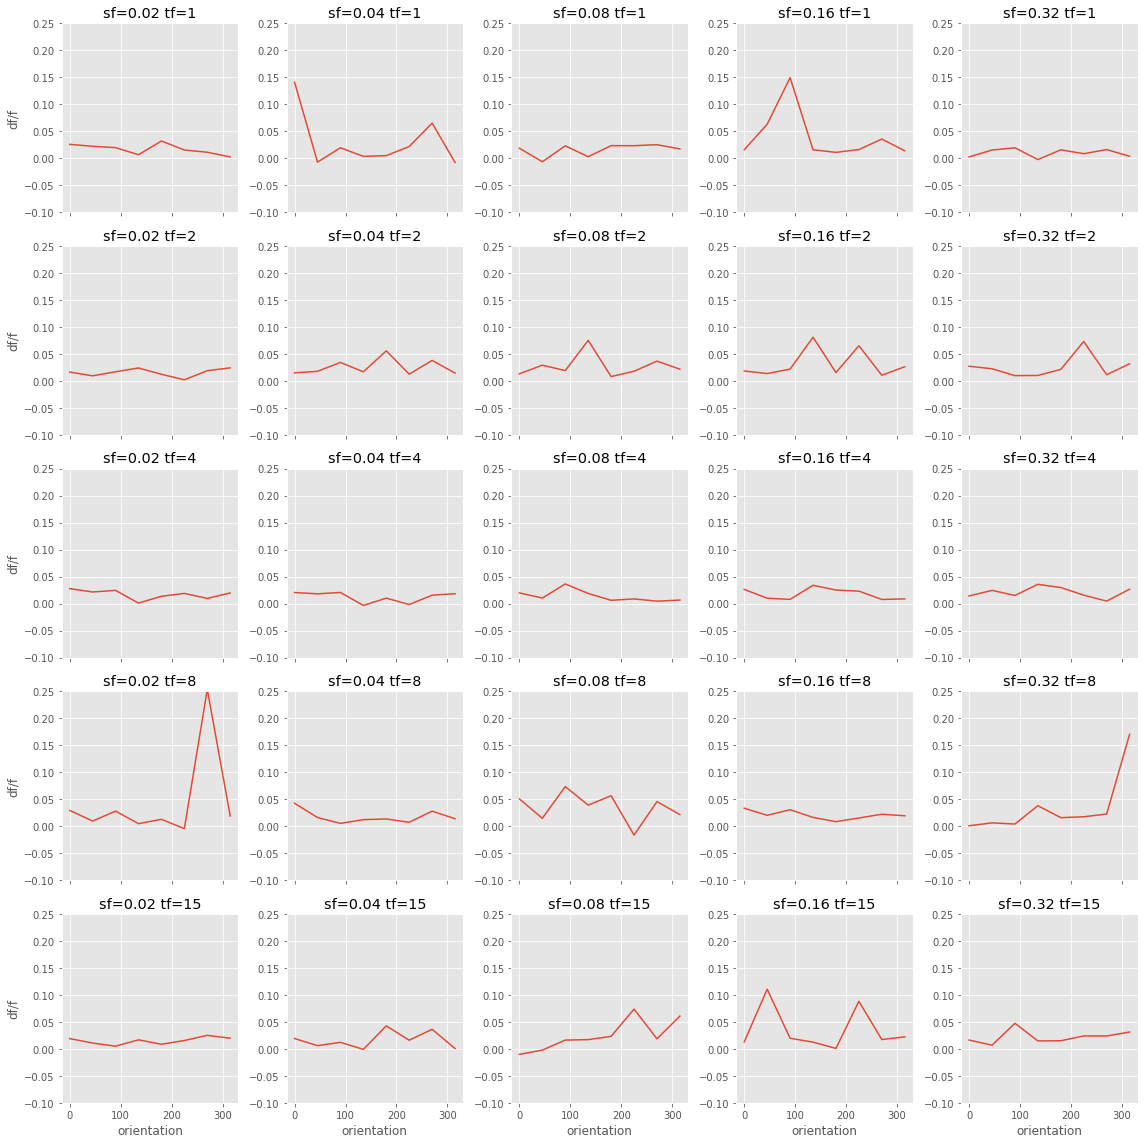

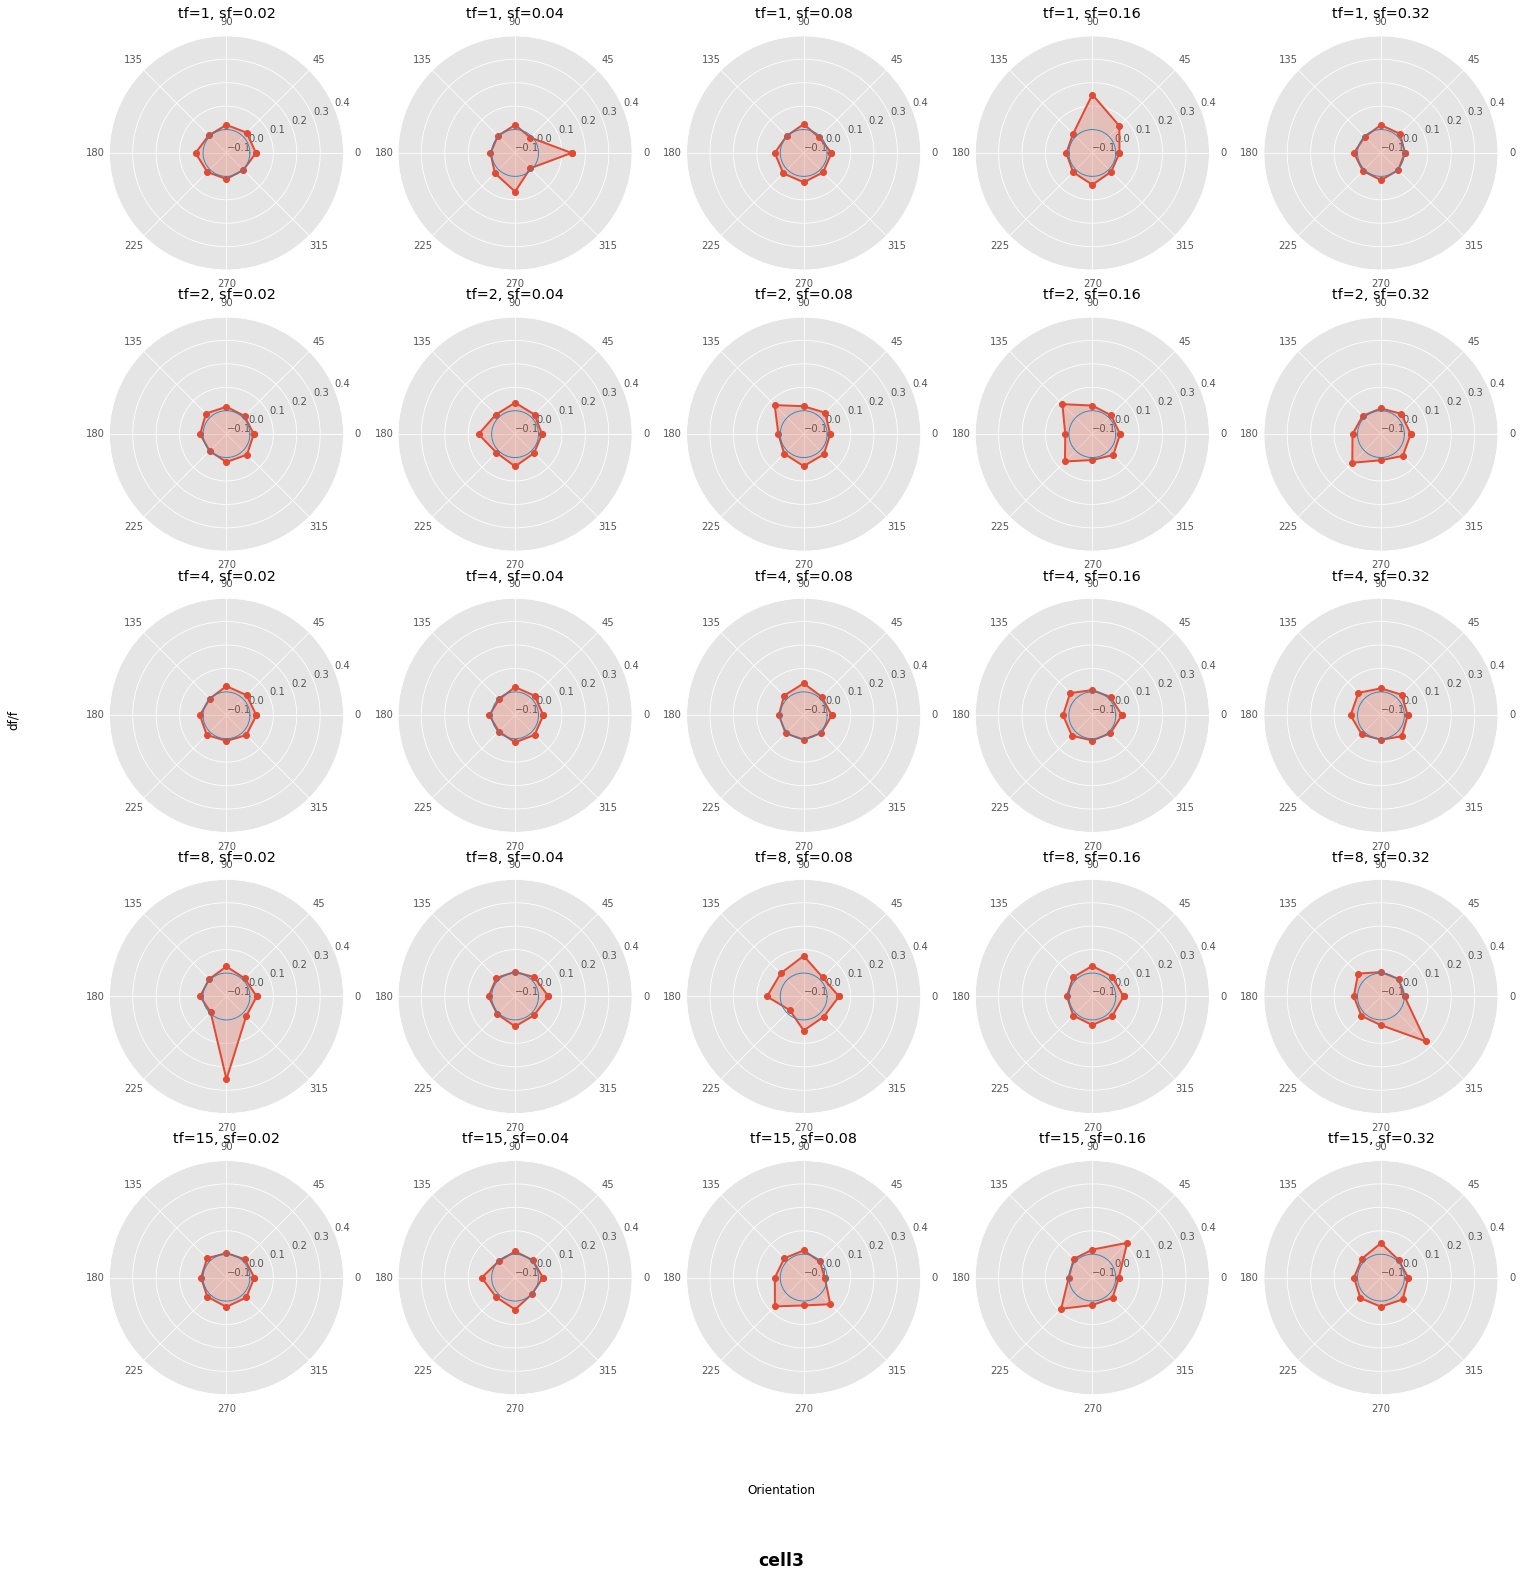

In [358]:
# plot direction tuning under different spatial frequencies, merged across temporal frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = groupedDF.loc[groupedDF['sf']==tempsf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under different temporal frequencies, merged across spatial frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = groupedDF.loc[groupedDF['tf']==temptf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under 5 sf * 5 tf combinations.


fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        axes[i,j].plot(groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['ori'], 
                       groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

plt.tight_layout()

# plot direction tuning under 5 sf * 5 tf combinations, using polar diagram.

ori = [0,45,90,135,180,225,270,315]
fig= plt.figure(figsize=(25, 25))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        
        stats = np.array(groupedDF.loc[(groupedDF['sf']==tempsf)&(groupedDF['tf']==temptf)]['dff']) 
        markers = np.linspace(-0.1, 0.4, 6) # make changes.
        labels = np.array(ori)
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats = np.concatenate((stats,[stats[0]]))
        angles = np.concatenate((angles,[angles[0]]))        
        circle = np.linspace(0, 2*np.pi, endpoint=False)
        circle = np.concatenate((circle,[circle[0]]))       
        ax = fig.add_subplot(5,5,i*5+j+1, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
        ax.plot(circle, np.zeros_like(circle), '-', linewidth=1)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        plt.yticks(markers)
        ax.set_title('tf='+str(tfset[i])+', sf='+str(sfset[j]))

fig.text(0.5, 0.03, 'cell3', ha='center',size = 'xx-large',fontweight = 'heavy')
fig.text(0.5, 0.07, 'Orientation', ha='center',size = 'large')
fig.text(0.07, 0.5, 'df/f', va='center', rotation='vertical',size = 'large')

In [364]:
### Neuron 4
# create a dataframe for ROI = [242:255,365:382]. shape=(1600,7)

DFneuron4 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron4.insert(6,'dff',dff_results(242,255,365,382)) 


In [365]:
# create a grouped dataframe of the neuron's dff under 5sf*5tf condition.

print(DFneuron4)
groupedDF4 = DFneuron4.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF4)

# update groupedDF. let groupedDF represent the current neuron.
groupedDF = groupedDF4

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8  0.233785
1      86248   86338    0  0.02   1       0.8  0.015485
2      87900   87990    0  0.02   1       0.8  0.036286
3     112976  113066    0  0.02   1       0.8  0.008783
4     132196  132286    0  0.02   1       0.8 -0.060779
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8 -0.123106
1596   70632   70722  315  0.32  15       0.8 -0.083756
1597   87750   87840  315  0.32  15       0.8  0.000836
1598  198865  198955  315  0.32  15       0.8  0.009792
1599  213881  213971  315  0.32  15       0.8 -0.052656

[1600 rows x 7 columns]
     tf    sf  ori       dff
0     1  0.02    0  0.027393
1     1  0.02   45 -0.014115
2     1  0.02   90  0.168431
3     1  0.02  135 -0.048184
4     1  0.02  180  0.145955
..   ..   ...  ...       ...
195  15  0.32  135  0.010386
196  15  0.32  180  0.149570
197  15  0.32  225  0.050661
198  15  0.32

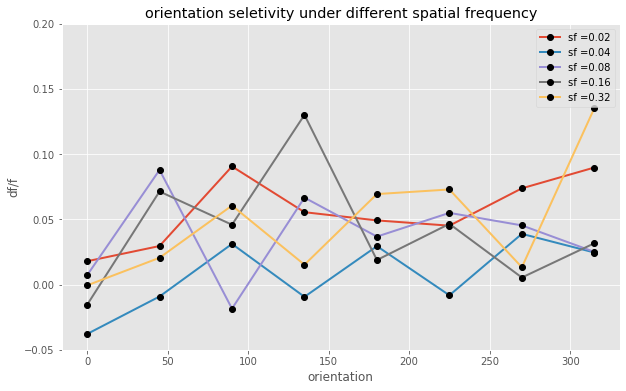

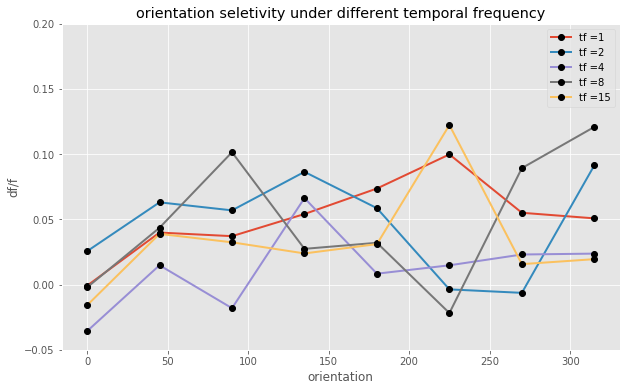

Text(0.07, 0.5, 'df/f')

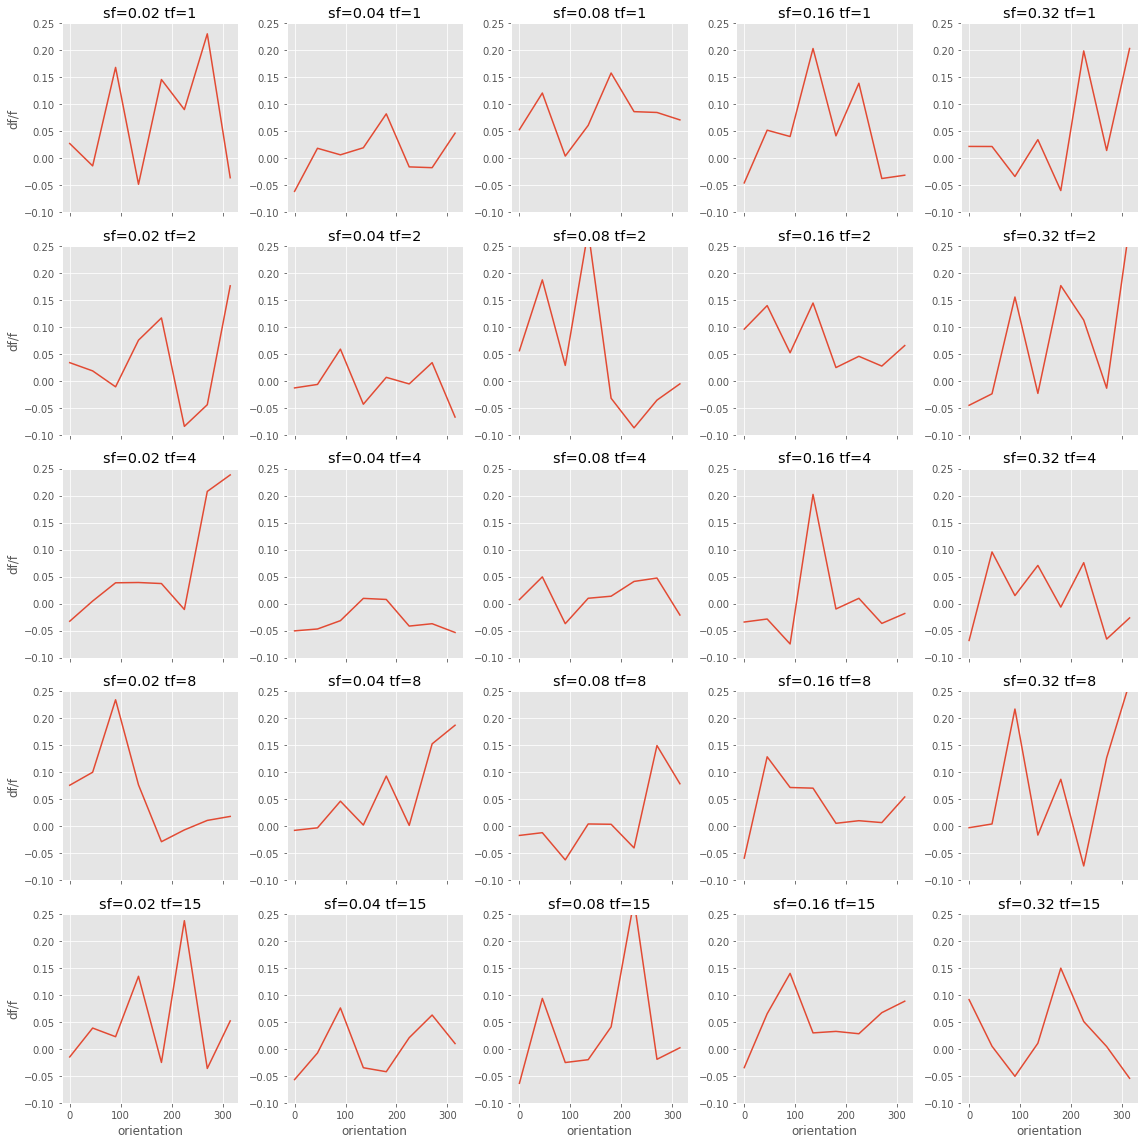

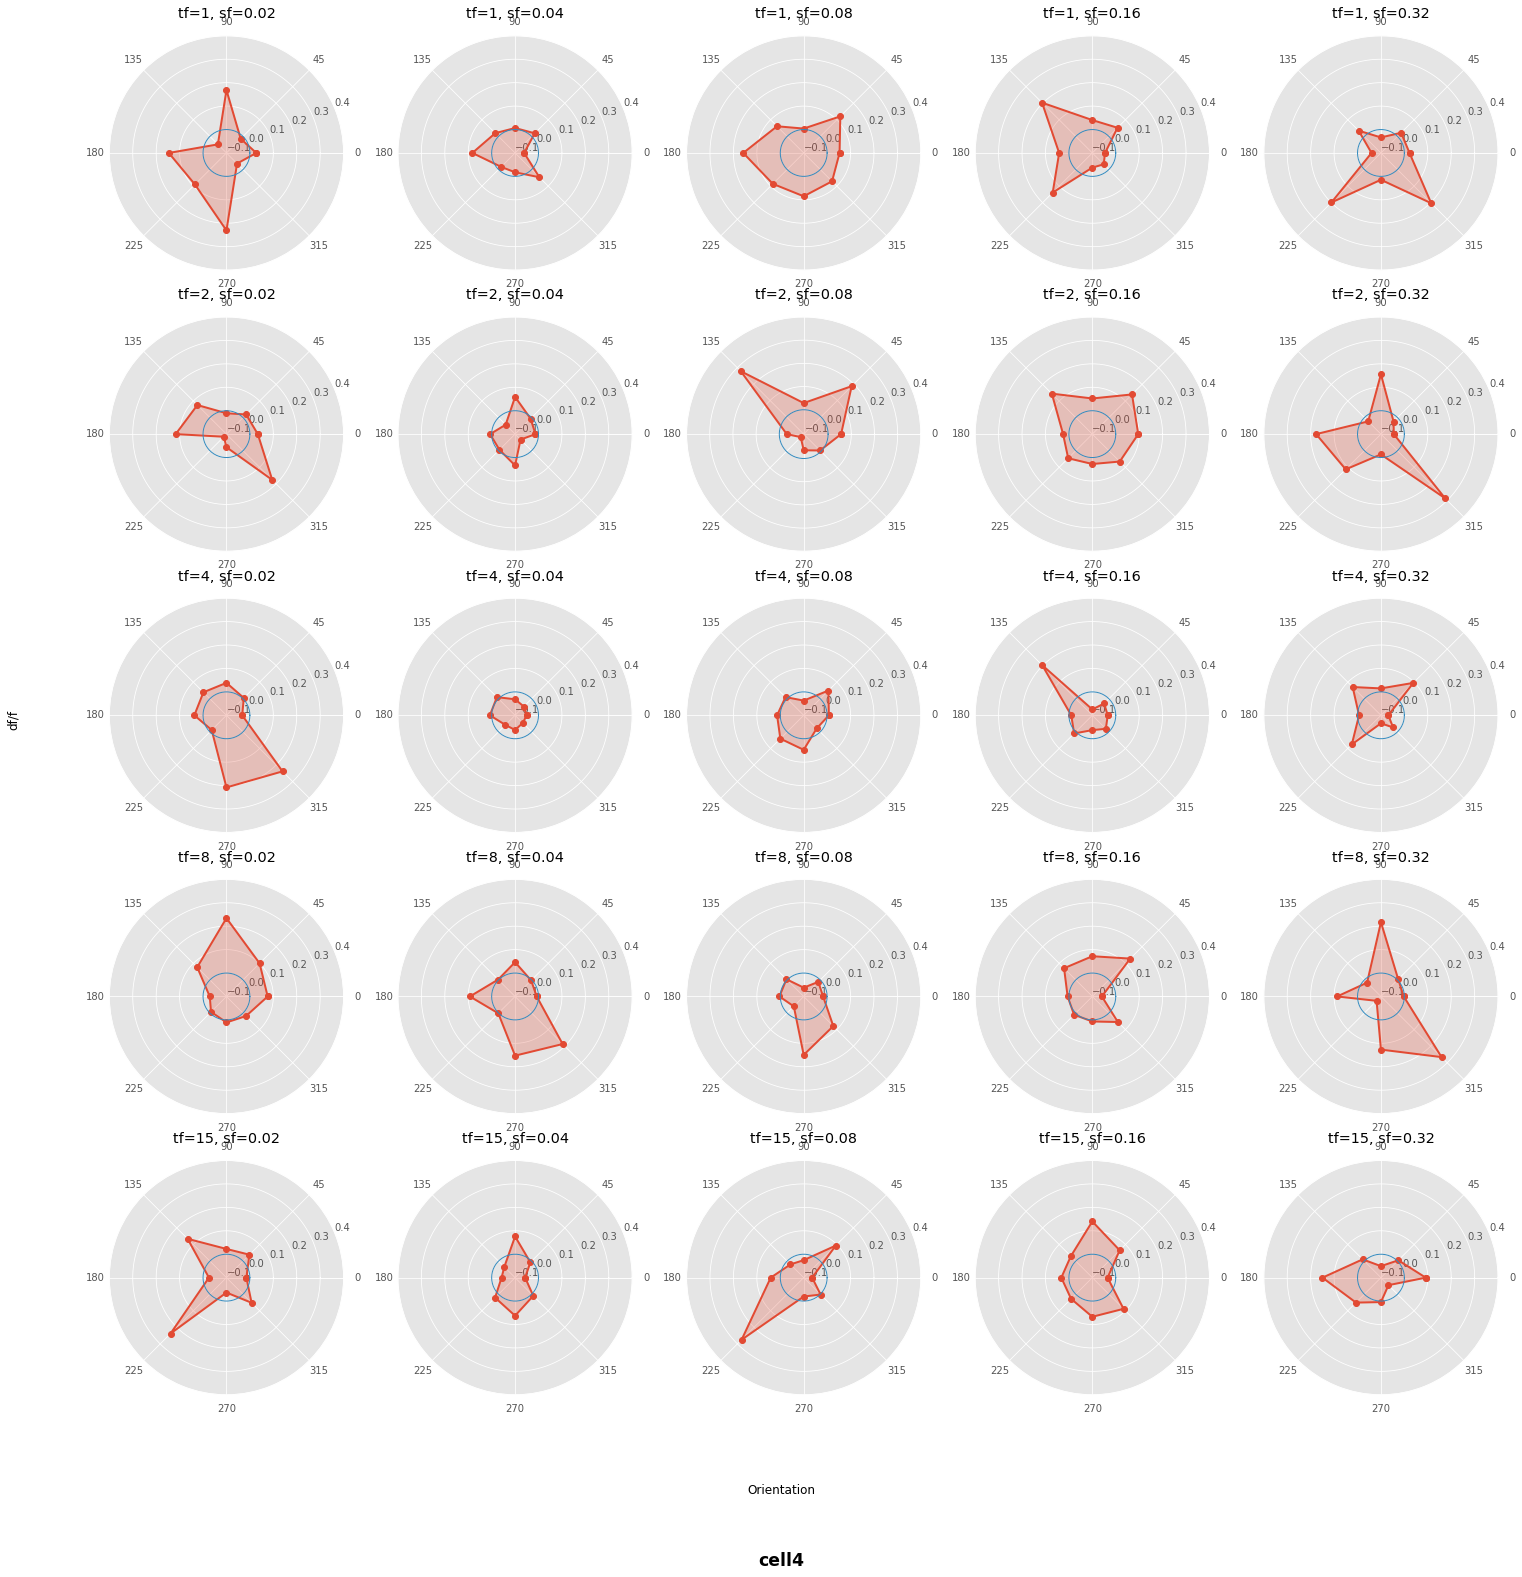

In [366]:
# plot direction tuning under different spatial frequencies, merged across temporal frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = groupedDF.loc[groupedDF['sf']==tempsf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under different temporal frequencies, merged across spatial frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = groupedDF.loc[groupedDF['tf']==temptf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under 5 sf * 5 tf combinations.


fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        axes[i,j].plot(groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['ori'], 
                       groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

plt.tight_layout()

# plot direction tuning under 5 sf * 5 tf combinations, using polar diagram.

ori = [0,45,90,135,180,225,270,315]
fig= plt.figure(figsize=(25, 25))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        
        stats = np.array(groupedDF.loc[(groupedDF['sf']==tempsf)&(groupedDF['tf']==temptf)]['dff']) 
        markers = np.linspace(-0.1, 0.4, 6) # make changes.
        labels = np.array(ori)
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats = np.concatenate((stats,[stats[0]]))
        angles = np.concatenate((angles,[angles[0]]))        
        circle = np.linspace(0, 2*np.pi, endpoint=False)
        circle = np.concatenate((circle,[circle[0]]))       
        ax = fig.add_subplot(5,5,i*5+j+1, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
        ax.plot(circle, np.zeros_like(circle), '-', linewidth=1)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        plt.yticks(markers)
        ax.set_title('tf='+str(tfset[i])+', sf='+str(sfset[j]))

fig.text(0.5, 0.03, 'cell4', ha='center',size = 'xx-large',fontweight = 'heavy')
fig.text(0.5, 0.07, 'Orientation', ha='center',size = 'large')
fig.text(0.07, 0.5, 'df/f', va='center', rotation='vertical',size = 'large')

In [371]:
### Neuron 5
# create a dataframe for ROI = [182:190,265:278]. shape=(1600,7)

DFneuron5 = pd.read_csv('data/PVC-7/122008_140124_windowmix/stimulus.csv')
DFneuron5.insert(6,'dff',dff_results(182,190,265,278)) 

In [372]:
# create a grouped dataframe of the neuron's dff under 5sf*5tf condition.

print(DFneuron5)
groupedDF5 = DFneuron5.groupby(['tf','sf','ori']).mean()['dff'].reset_index()
print(groupedDF5)

# update groupedDF. let groupedDF represent the current neuron.
groupedDF = groupedDF5

       start     end  ori    sf  tf  contrast       dff
0      31141   31231    0  0.02   1       0.8 -0.018464
1      86248   86338    0  0.02   1       0.8  0.053358
2      87900   87990    0  0.02   1       0.8  0.030931
3     112976  113066    0  0.02   1       0.8  0.075532
4     132196  132286    0  0.02   1       0.8 -0.016927
...      ...     ...  ...   ...  ..       ...       ...
1595   64175   64265  315  0.32  15       0.8 -0.011137
1596   70632   70722  315  0.32  15       0.8  0.052331
1597   87750   87840  315  0.32  15       0.8  0.056744
1598  198865  198955  315  0.32  15       0.8  0.021707
1599  213881  213971  315  0.32  15       0.8  0.022148

[1600 rows x 7 columns]
     tf    sf  ori       dff
0     1  0.02    0  0.019599
1     1  0.02   45  0.004089
2     1  0.02   90  0.009776
3     1  0.02  135  0.010426
4     1  0.02  180  0.017584
..   ..   ...  ...       ...
195  15  0.32  135  0.001520
196  15  0.32  180  0.048667
197  15  0.32  225  0.016360
198  15  0.32

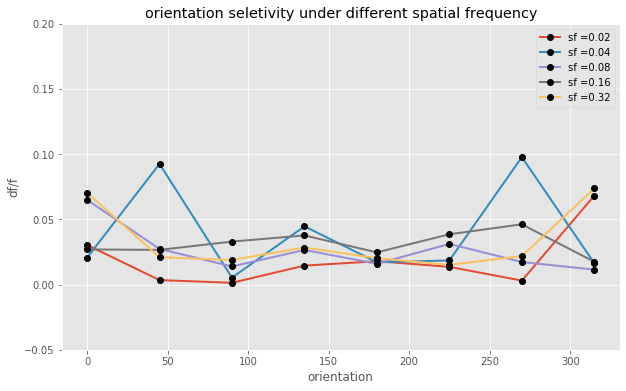

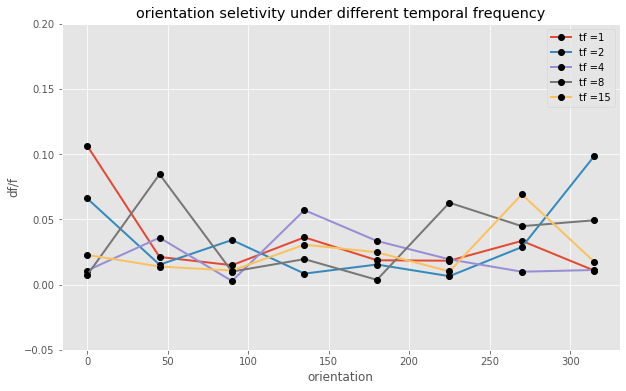

Text(0.07, 0.5, 'df/f')

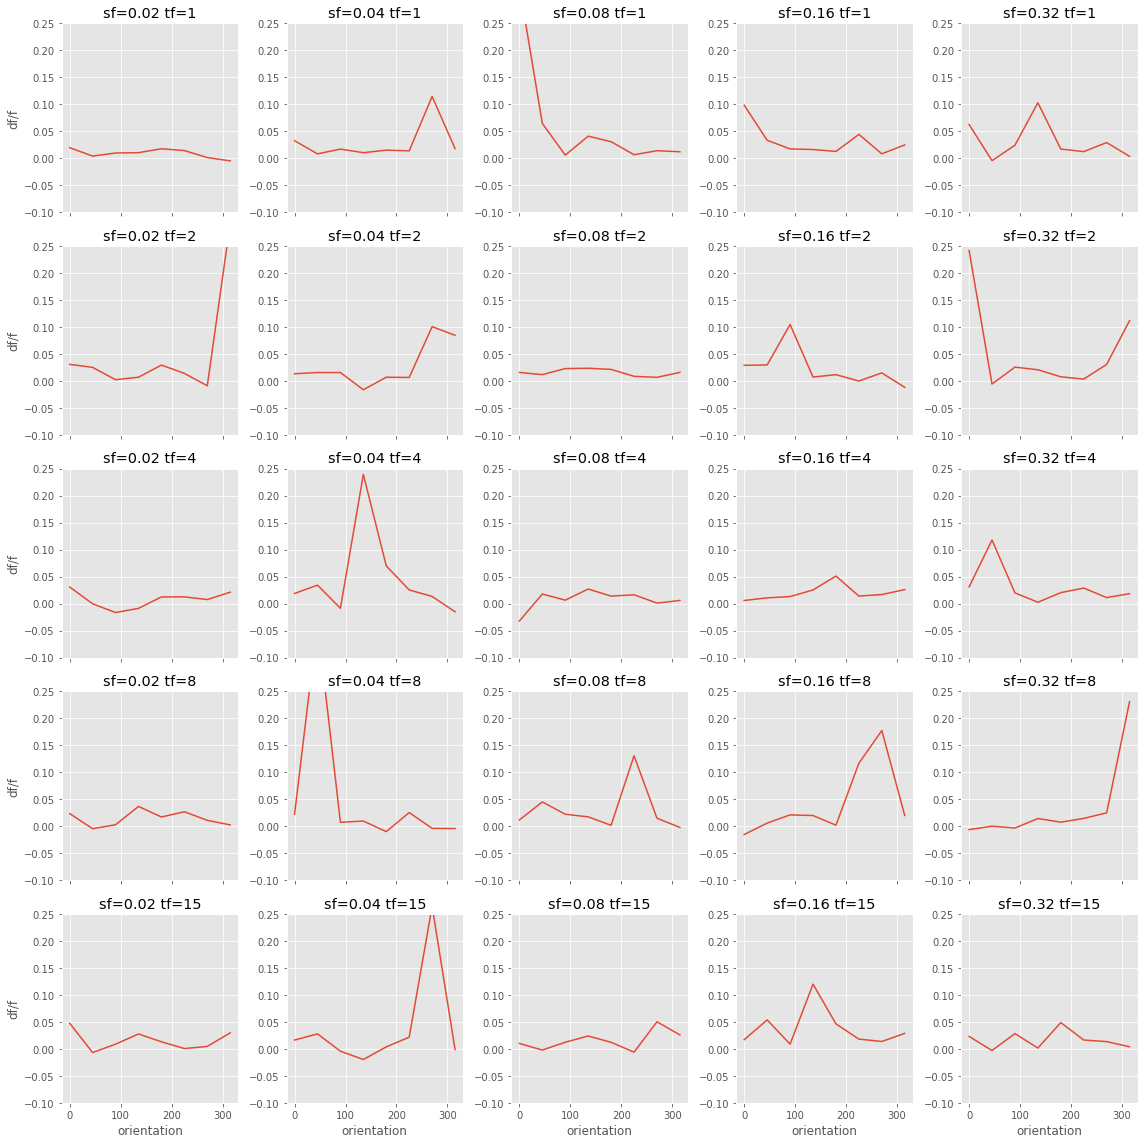

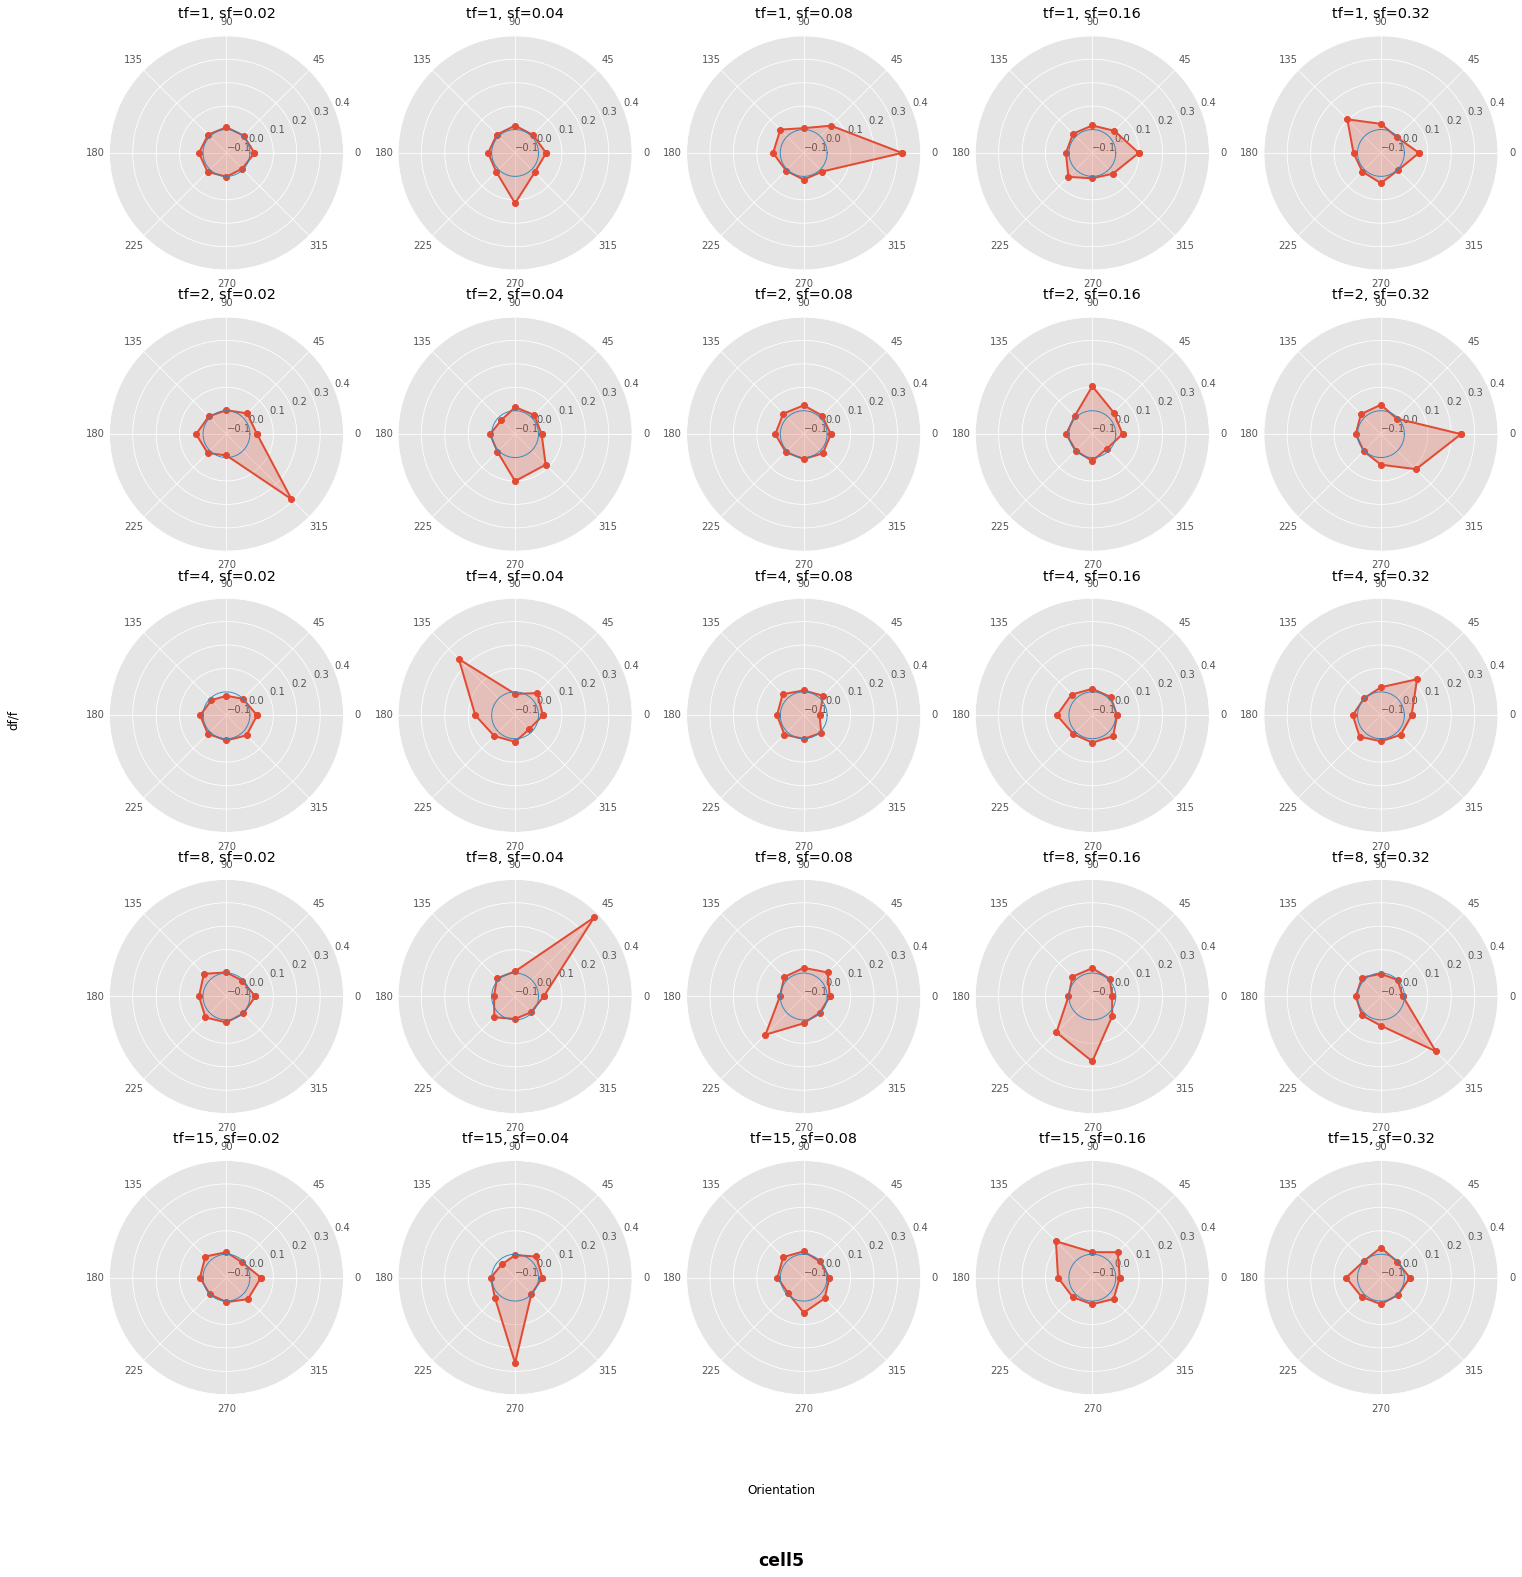

In [373]:
# plot direction tuning under different spatial frequencies, merged across temporal frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    tempsf = sfset[i]
    sub_sf = groupedDF.loc[groupedDF['sf']==tempsf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_sf.ori,sub_sf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'sf ='+str(tempsf))

plt.title('orientation seletivity under different spatial frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under different temporal frequencies, merged across spatial frequencies

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))

for i in np.arange(5):
    temptf = tfset[i]
    sub_tf = groupedDF.loc[groupedDF['tf']==temptf].groupby(groupedDF['ori']).mean()
    plt.plot(sub_tf.ori,sub_tf.dff,
             linestyle = '-',
             linewidth = 2,
             marker = 'o',
             markersize = 6,
             markeredgecolor='black',
             markerfacecolor='black',
             label = 'tf ='+str(temptf))  

plt.title('orientation seletivity under different temporal frequency')
plt.xlabel('orientation')
plt.ylabel('df/f')
plt.ylim(-0.05,0.2)
plt.legend()
plt.show()

# plot direction tuning under 5 sf * 5 tf combinations.


fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, figsize=(16, 16))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        axes[i,j].plot(groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['ori'], 
                       groupedDF.loc[(groupedDF['sf']==tempsf) & (groupedDF['tf']==temptf)]['dff'])
        axes[i,j].set_ylim(-0.1,0.25)
        axes[i,j].set_title('sf='+str(tempsf)+' tf='+str(temptf))
        for m, row in enumerate(axes):
            for n, col in enumerate(row):
                if col.is_last_row():
                    col.set_xlabel('orientation')
                if col.is_first_col():
                    col.set_ylabel('df/f')

plt.tight_layout()

# plot direction tuning under 5 sf * 5 tf combinations, using polar diagram.

ori = [0,45,90,135,180,225,270,315]
fig= plt.figure(figsize=(25, 25))
for i in np.arange(5):
    temptf=tfset[i]
    for j in np.arange(5):
        tempsf=sfset[j]
        
        stats = np.array(groupedDF.loc[(groupedDF['sf']==tempsf)&(groupedDF['tf']==temptf)]['dff']) 
        markers = np.linspace(-0.1, 0.4, 6) # make changes.
        labels = np.array(ori)
        angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats = np.concatenate((stats,[stats[0]]))
        angles = np.concatenate((angles,[angles[0]]))        
        circle = np.linspace(0, 2*np.pi, endpoint=False)
        circle = np.concatenate((circle,[circle[0]]))       
        ax = fig.add_subplot(5,5,i*5+j+1, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
        ax.plot(circle, np.zeros_like(circle), '-', linewidth=1)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        plt.yticks(markers)
        ax.set_title('tf='+str(tfset[i])+', sf='+str(sfset[j]))

fig.text(0.5, 0.03, 'cell5', ha='center',size = 'xx-large',fontweight = 'heavy')
fig.text(0.5, 0.07, 'Orientation', ha='center',size = 'large')
fig.text(0.07, 0.5, 'df/f', va='center', rotation='vertical',size = 'large')

In [374]:
# Define a function DSI_calculation to calculate DSI under 5sf * 5tf conditions.

def DSI_calculation(groupedDF):
    max_dff = np.array(groupedDF[['tf','sf','dff']].groupby(['tf','sf']).max()['dff']) # max dff, array
    rows_max_dff = groupedDF.loc[groupedDF['dff'].isin(max_dff)] # rows of max dff
    pref_ori = np.array(rows_max_dff['ori']) # prefori, array
    nonpref_ori = (pref_ori+180)%360 # nonprefori, array
    # take out the nonpref_dff 
    nonpref_dff = []
    for i, tfi in enumerate(rows_max_dff['tf']):
        tfi=tfi
        sfi=list(rows_max_dff['sf'])[i]
        orii=nonpref_ori[i]
        nonpref_dff_i = groupedDF[(groupedDF["tf"]==tfi)
                                  & (groupedDF["sf"]==sfi)
                                  & (groupedDF["ori"]==orii)]['dff']
        nonpref_dff.append(np.array(nonpref_dff_i)[0])

    df_all = rows_max_dff.rename(columns={'dff':'pref_dff','ori':'pref_ori'})
    df_all['dff_nonpref']=nonpref_dff

    df_all['DSI'] = (df_all['pref_dff']-df_all['dff_nonpref'])/df_all['pref_dff']
    return df_all


In [375]:
# generate a long dataframe, containing each neuron's DSI under 5sf * 5tf

# update the number as I have more cells
cell_count = 5 

DSI_all_cells = pd.DataFrame(columns=['tf', 'sf', 'pref_ori', 'pref_dff','dff_nonpref','DSI'],dtype=np.int8)

cell_idx = []
for i in range(1,cell_count+1):
    DFname = locals()['groupedDF'+str(i)]
    DSI_all_cells = DSI_all_cells.append(DSI_calculation(DFname))
    cell_idx = cell_idx + [i]*25
    DSI_all_cells['cell'] = np.array(cell_idx)


DSI_all_cells

/Users/evelyn/opt/anaconda3/envs/comp-neurosci/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


DSI  cell  dff_nonpref  pref_dff  pref_ori    sf  tf
6    0.728761     1     0.041108  0.151558       270  0.02   1
10   0.074353     1     0.056151  0.060662        90  0.04   1
19   1.432299     1    -0.038510  0.089082       135  0.08   1
26   0.134511     1     0.162350  0.187582        90  0.16   1
32   1.241692     1    -0.043495  0.179959         0  0.32   1
..        ...   ...          ...       ...       ...   ...  ..
160  0.723217     5     0.013095  0.047312         0  0.02  15
174  1.016452     5    -0.004345  0.264096       270  0.04  15
182  0.755186     5     0.012279  0.050158       270  0.08  15
187  0.760872     5     0.028652  0.119818       135  0.16  15
196  0.526212     5     0.023058  0.048667       180  0.32  15

[125 rows x 7 columns]

In [376]:
# statictical analysis, one-way ANOVA

import scipy.stats as stats
from scipy.stats import f_oneway

# based on the literature, pick tf = 4 and test the difference across sf 

res_sf=stats.f_oneway(DSI_all_cells['DSI'][(DSI_all_cells.tf == 4) & (DSI_all_cells.sf == 0.02)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 4) & (DSI_all_cells.sf == 0.04)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 4) & (DSI_all_cells.sf == 0.08)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 4) & (DSI_all_cells.sf == 0.16)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 4) & (DSI_all_cells.sf == 0.32)])
print("DSI did not show significant difference under varing spatial frequencies,", res_sf)

# based on the literature, pick sf = 0.04 and test the difference across tf

res_tf=stats.f_oneway(DSI_all_cells['DSI'][(DSI_all_cells.tf == 1) & (DSI_all_cells.sf == 0.04)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 2) & (DSI_all_cells.sf == 0.04)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 4) & (DSI_all_cells.sf == 0.04)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 8) & (DSI_all_cells.sf == 0.04)],
              DSI_all_cells['DSI'][(DSI_all_cells.tf == 15) & (DSI_all_cells.sf == 0.04)])
print("DSI did not show significant difference under varing temoporal frequencies,", res_tf)

DSI did not show significant difference under varing spatial frequencies, F_onewayResult(statistic=0.990229304402677, pvalue=0.4355268687900228)
DSI did not show significant difference under varing temoporal frequencies, F_onewayResult(statistic=0.8381708469812944, pvalue=0.5170721592016169)


In [377]:
# calculate the DSI_mean for 5sf * 5tf conditions, to be used in bar plots.

DSI_mean = DSI_all_cells.groupby(['tf','sf']).mean()['DSI'].reset_index()
DSI_mean

tf    sf       DSI
0    1  0.02  0.418284
1    1  0.04  0.836577
2    1  0.08  0.637160
3    1  0.16  0.632126
4    1  0.32  0.646330
5    2  0.02  0.757565
6    2  0.04  0.579017
7    2  0.08  0.899508
8    2  0.16  0.825665
9    2  0.32  0.822229
10   4  0.02  0.640139
11   4  0.04  1.869988
12   4  0.08  0.748134
13   4  0.16  0.679429
14   4  0.32  0.570377
15   8  0.02  1.016988
16   8  0.04  0.932720
17   8  0.08  0.805164
18   8  0.16  0.769503
19   8  0.32  1.002509
20  15  0.02  0.825682
21  15  0.04  0.755441
22  15  0.08  0.769649
23  15  0.16  0.518763
24  15  0.32  0.703728

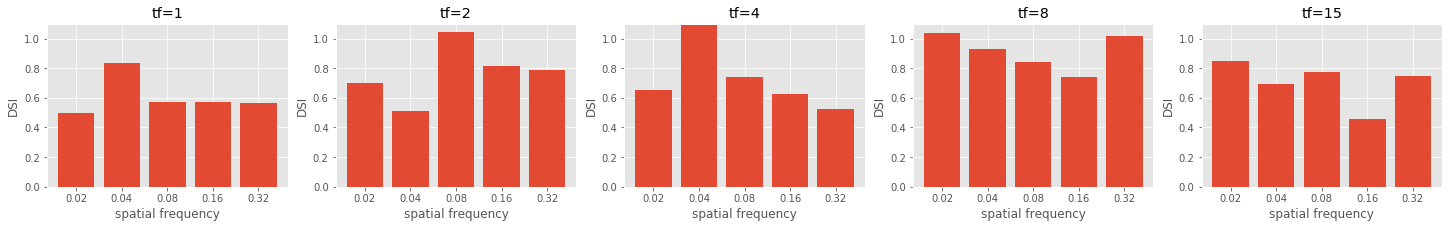

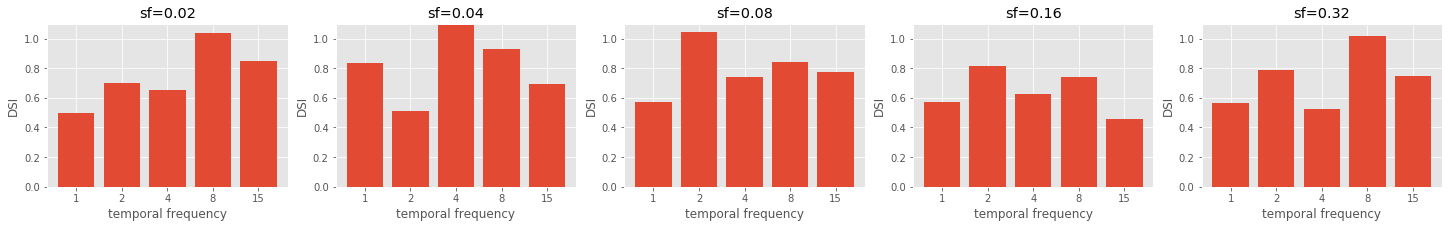

In [370]:
# generate bar plots for the two the one-way ANOVAs

fig, axes=plt.subplots(nrows=1, ncols=5, figsize=(25, 3))
for i, temptf in enumerate(tfset):
    labels = list(sfset)
    axes[i].bar([1,2,3,4,5],DSI_mean[DSI_mean.tf==temptf]['DSI'],width=0.8,tick_label=labels)
    axes[i].set_xlabel('spatial frequency')
    axes[i].set_ylabel('DSI')
    axes[i].set_ylim(0,1.1)
    axes[i].set_title('tf='+str(tfset[i]))

fig, axes=plt.subplots(nrows=1, ncols=5, figsize=(25, 3))
for i, tempsf in enumerate(sfset):
    labels = list(tfset)
    axes[i].bar([1,2,3,4,5],DSI_mean[DSI_mean.sf==tempsf]['DSI'],width=0.8,tick_label=labels)
    axes[i].set_xlabel('temporal frequency')
    axes[i].set_ylabel('DSI')
    axes[i].set_ylim(0,1.1)
    axes[i].set_title('sf='+str(sfset[i]))
